In [71]:
# 3rd Party Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
import matplotlib as plt
import geopandas as gpd
from shapely.geometry import Point
from matplotlib import animation

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)


In [100]:
data = pd.read_csv("../2_data_cleaning/cleaned_csv/housesigma_data_2003_with_coords_date.csv")
data_cleaned = data.dropna(subset=['lat'])
data_cleaned

,Unnamed: 0,link,strikethrough_price,sold_price,property_type,address,date,lat,long,standardized_date
1,1,/on/toronto-real-estate/6-newmarket-ave/home/B...,"$1,050,000","$980,000",Detached,"6 newmarket ave , toronto - woodbine-lumsden",1 day ago,43.689392,-79.307637,2024-11-29 17:59:11.298791
2,2,/on/toronto-real-estate/112-rosethorn-ave/home...,"$789,000","$930,000",Semi-Detached,"112 rosethorn ave , toronto - weston-pellam park",1 day ago,43.679596,-79.463392,2024-11-29 17:59:11.298791
3,3,/on/toronto-real-estate/82-bowie-ave/home/0J6E...,"$1,239,000","$1,228,018",Detached,"82 bowie ave , toronto - briar hill-belgravia",2 days ago,43.696858,-79.455367,2024-11-28 17:59:11.298791
10,10,/on/toronto-real-estate/145-ronan-ave/home/obq...,"$1,525,000","$1,525,000",Semi-Detached,"145 ronan ave , toronto - lawrence park north",2 days ago,43.730574,-79.395229,2024-11-28 17:59:11.298791
11,11,/on/toronto-real-estate/44-endean-ave/home/L5V...,"$1,799,000","$1,975,000",Detached,"44 endean ave , toronto - south riverdale",2 days ago,43.669145,-79.333422,2024-11-28 17:59:11.298791
...,...,...,...,...,...,...,...,...,...,...
117932,29932,/on/toronto-real-estate/409-roselawn-ave/home/...,"$399,000","$405,500",Detached,"409 Roselawn Ave , Toronto - Lawrence Park South",2003-12-12,43.708247,-79.411054,NaN
117933,29933,/on/toronto-real-estate/1105-dundas-st-e/home/...,"$399,900","$370,000",Freehold Townhouse,"(Address not available) , Toronto - South Rive...",2003-12-12,43.658399,-79.338960,NaN
117934,29934,/on/toronto-real-estate/68-lawlor-ave/home/5xL...,"$289,900","$315,500",Semi-Detached,"(Address not available) , Toronto - East End-D...",2003-12-12,43.678182,-79.309632,NaN
117935,29935,/on/toronto-real-estate/160-gledhill-ave/home/...,"$175,900","$173,000",Detached,"(Address not available) , Toronto - Woodbine-L...",2003-12-12,43.694333,-79.308621,NaN


In [ ]:
# Extract the date portion by splitting at the space or time delimiter
data_cleaned['standardized_date'] = data_cleaned['standardized_date'].dropna().str.split(' ').str[0]

# Convert to datetime to ensure consistent date format
data_cleaned['standardized_date'] = pd.to_datetime(data_cleaned['standardized_date'], errors='coerce')

# Optional: Check for any invalid dates after conversion
invalid_dates = data_cleaned[data_cleaned['standardized_date'].isna()]
data_cleaned.to_csv("../2_data_cleaning/cleaned_csv/housesigma_data_2003_with_coords_date.csv")

,Unnamed: 0,link,strikethrough_price,sold_price,property_type,address,date,lat,long,standardized_date
1,1,/on/toronto-real-estate/6-newmarket-ave/home/B...,"$1,050,000","$980,000",Detached,"6 newmarket ave , toronto - woodbine-lumsden",1 day ago,43.689392,-79.307637,2024-11-29
2,2,/on/toronto-real-estate/112-rosethorn-ave/home...,"$789,000","$930,000",Semi-Detached,"112 rosethorn ave , toronto - weston-pellam park",1 day ago,43.679596,-79.463392,2024-11-29
3,3,/on/toronto-real-estate/82-bowie-ave/home/0J6E...,"$1,239,000","$1,228,018",Detached,"82 bowie ave , toronto - briar hill-belgravia",2 days ago,43.696858,-79.455367,2024-11-28
10,10,/on/toronto-real-estate/145-ronan-ave/home/obq...,"$1,525,000","$1,525,000",Semi-Detached,"145 ronan ave , toronto - lawrence park north",2 days ago,43.730574,-79.395229,2024-11-28
11,11,/on/toronto-real-estate/44-endean-ave/home/L5V...,"$1,799,000","$1,975,000",Detached,"44 endean ave , toronto - south riverdale",2 days ago,43.669145,-79.333422,2024-11-28
...,...,...,...,...,...,...,...,...,...,...
117932,29932,/on/toronto-real-estate/409-roselawn-ave/home/...,"$399,000","$405,500",Detached,"409 Roselawn Ave , Toronto - Lawrence Park South",2003-12-12,43.708247,-79.411054,NaT
117933,29933,/on/toronto-real-estate/1105-dundas-st-e/home/...,"$399,900","$370,000",Freehold Townhouse,"(Address not available) , Toronto - South Rive...",2003-12-12,43.658399,-79.338960,NaT
117934,29934,/on/toronto-real-estate/68-lawlor-ave/home/5xL...,"$289,900","$315,500",Semi-Detached,"(Address not available) , Toronto - East End-D...",2003-12-12,43.678182,-79.309632,NaT
117935,29935,/on/toronto-real-estate/160-gledhill-ave/home/...,"$175,900","$173,000",Detached,"(Address not available) , Toronto - Woodbine-L...",2003-12-12,43.694333,-79.308621,NaT


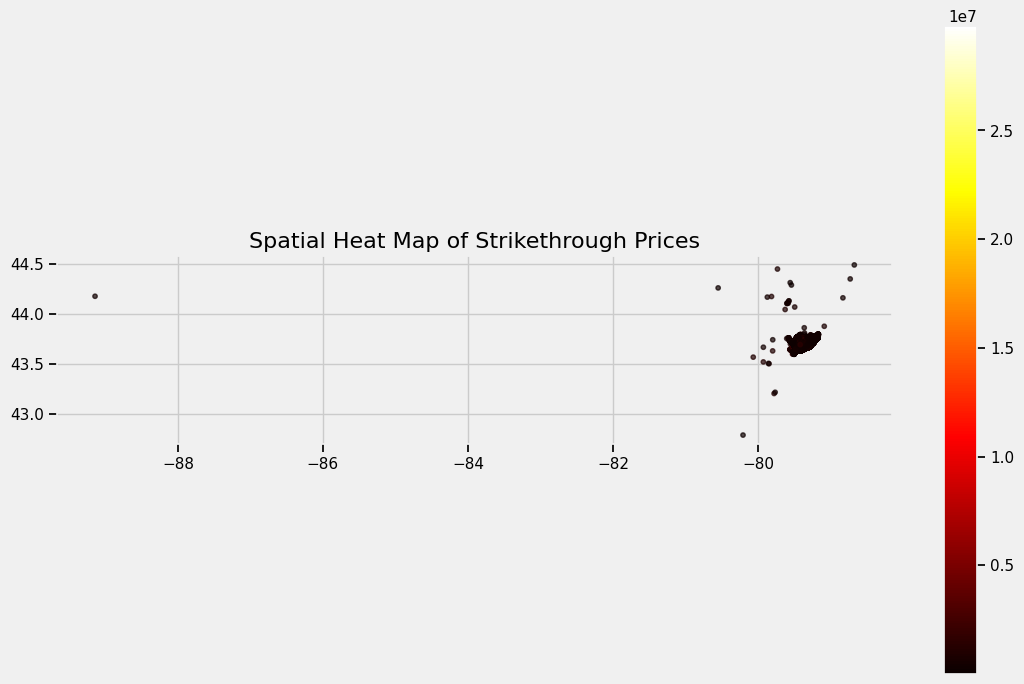

In [74]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the data
data = data_cleaned
# Data cleaning
data_cleaned = data.dropna(subset=['lat', 'long', 'standardized_date'])  # Drop rows with missing data
data_cleaned['strikethrough_price'] = data_cleaned['strikethrough_price'].replace(
    {'\$': '', ',': ''}, regex=True).astype(float)  # Convert prices to numeric

# Create GeoDataFrame
gdf = gpd.GeoDataFrame(
    data_cleaned,
    geometry=gpd.points_from_xy(data_cleaned['long'], data_cleaned['lat']),
    crs="EPSG:4326"
)

# Plot a heat map
fig, ax = plt.subplots(figsize=(12, 8))
gdf.plot(
    ax=ax,
    column='strikethrough_price',  # Color based on price
    cmap='hot',  # Heat map color scheme
    markersize=10,  # Adjust marker size
    legend=True,  # Add legend for the color scale
    alpha=0.7  # Transparency for better visibility
)

ax.set_title("Spatial Heat Map of Strikethrough Prices", fontsize=16)
plt.show()


In [93]:
# Step 1: Clean the 'strikethrough_price' column
data_cleaned['strikethrough_price'] = data_cleaned['strikethrough_price'].replace(
    {'\$': '', ',': ''}, regex=True
)

# Step 2: Convert to numeric, forcing invalid entries to NaN
data_cleaned['strikethrough_price'] = pd.to_numeric(data_cleaned['strikethrough_price'], errors='coerce')

# Step 3: Fill NaN with a default value (e.g., 0) and convert to integer



In [99]:
import pandas as pd
import folium
from folium.plugins import HeatMapWithTime

# Ensure `data_cleaned` is loaded and contains 'lat', 'long', and 'standardized_date'
# Convert standardized_date to datetime
data_cleaned['standardized_date'] = pd.to_datetime(data_cleaned['standardized_date'])

# Filter `strikethrough_price` between 400,000 and 1,500,000
data_cleaned = data_cleaned[
    (data_cleaned['strikethrough_price'] >= 400000) & (data_cleaned['strikethrough_price'] <= 1500000)
]

# Extract year from standardized_date
data_cleaned['year'] = data_cleaned['standardized_date'].dt.year

# Prepare data for HeatMapWithTime
heat_data = []
time_labels = []

for year in sorted(data_cleaned['year'].unique()):
    yearly_data = data_cleaned[data_cleaned['year'] == year]
    
    # Format for HeatMapWithTime: [[lat, long, intensity], ...]
    yearly_heat_points = [
        [row['lat'], row['long'], row['strikethrough_price'] / 5000000]  # Normalize to range [0, 1]
        for _, row in yearly_data.iterrows()
    ]
    
    heat_data.append(yearly_heat_points)  # Add the year's heat points
    time_labels.append(str(year))  # Add the year as a time label

# Create a Folium map centered on Toronto
map = folium.Map(location=[43.7, -79.4], zoom_start=11)

# Add HeatMapWithTime
HeatMapWithTime(
    data=heat_data,
    index=time_labels,  # Time labels for the slider
    radius=15,  # Size of heat points
    gradient={0: 'yellow', 0.5: 'orange', 1: 'red'},  # Custom gradient
    auto_play=True,  # Automatically play the animation
    max_opacity=0.8  # Adjust transparency
).add_to(map)

# Add a custom legend
legend_html = '''
<div style="
    position: fixed;
    bottom: 50px;
    left: 50px;
    width: 200px;
    height: 150px;
    background-color: white;
    border:2px solid grey;
    z-index:9999;
    font-size:14px;
    padding: 10px;
">
<b>Heatmap Legend</b><br>
<i style="background:yellow; width:10px; height:10px; float:left; margin-right:5px;"></i> Low Price (400k)<br>
<i style="background:orange; width:10px; height:10px; float:left; margin-right:5px;"></i> Medium Price<br>
<i style="background:red; width:10px; height:10px; float:left; margin-right:5px;"></i> High Price (1.5M)<br>
</div>
'''
map.get_root().html.add_child(folium.Element(legend_html))

# Save and display the map
map.save('animated_heatmap_with_custom_gradient.html')  # Save the map to an HTML file
print("Animated heatmap saved as 'animated_heatmap_with_custom_gradient.html'. Open it in a browser to view.")


Animated heatmap saved as 'animated_heatmap_with_custom_gradient.html'. Open it in a browser to view.


In [94]:
data_cleaned.groupby('year')['strikethrough_price'].mean()

year
2003.0    4.173644e+05
2004.0    4.628652e+05
2005.0    4.860638e+05
2006.0    5.128318e+05
2007.0    5.909621e+05
2008.0    5.450712e+05
2009.0    6.201250e+05
2010.0    6.535357e+05
2011.0    7.004354e+05
2012.0    7.278166e+05
2013.0    8.202798e+05
2014.0    8.826843e+05
2015.0    9.737739e+05
2016.0    1.141003e+06
2017.0    1.195962e+06
2018.0    1.271110e+06
2019.0    1.282133e+06
2020.0    1.394251e+06
2021.0    1.577042e+06
2022.0    1.574184e+06
2023.0    1.608110e+06
2024.0    1.642157e+06
Name: strikethrough_price, dtype: float64